In [1]:
import pandas as pd 
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf


trainData=pd.read_csv('/Users/tarunvarma/Downloads/Data/train.csv')
x_train = np.array(trainData.iloc[:, 1:])
y_train= trainData.iloc[:, 0]
x_train = x_train.reshape(-1, 28, 28, 1)

x_train=x_train/255



model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64,(5,5),activation='relu',input_shape=(24,24,32)),
    tf.keras.layers.Conv2D(128,(5,5),activation='relu'), 
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(264,(5,5),activation='relu'), 

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val), callbacks = [early_stopping])



testData=pd.read_csv('/Users/tarunvarma/Downloads/Data/test.csv')
x_test = np.array(testData.iloc[:, 1:])
y_test= testData.iloc[:, 0]
x_test = x_test.reshape(-1, 28, 28, 1)
x_test=x_test/255
model.evaluate(x_test, y_test)



Epoch 1/100


2023-08-02 20:14:52.444992: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


844/844 [==============================] - 61s 73ms/step - loss: 0.5211 - accuracy: 0.8054 - val_loss: 0.3473 - val_accuracy: 0.8793
Epoch 2/100
844/844 [==============================] - 62s 73ms/step - loss: 0.3144 - accuracy: 0.8848 - val_loss: 0.2869 - val_accuracy: 0.8965
Epoch 3/100
844/844 [==============================] - 65s 77ms/step - loss: 0.2600 - accuracy: 0.9049 - val_loss: 0.2716 - val_accuracy: 0.9010
Epoch 4/100
844/844 [==============================] - 66s 78ms/step - loss: 0.2264 - accuracy: 0.9172 - val_loss: 0.2626 - val_accuracy: 0.9053
Epoch 5/100
844/844 [==============================] - 65s 77ms/step - loss: 0.1936 - accuracy: 0.9295 - val_loss: 0.2463 - val_accuracy: 0.9113
Epoch 6/100
844/844 [==============================] - 64s 75ms/step - loss: 0.1627 - accuracy: 0.9395 - val_loss: 0.2381 - val_accuracy: 0.9173
Epoch 7/100
844/844 [==============================] - 66s 78ms/step - loss: 0.1436 - accuracy: 0.9465 - val_loss: 0.2667 - val_accuracy: 0.90

[0.22187621891498566, 0.9190999865531921]

In [2]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2219 - accuracy: 0.9191


[0.22187621891498566, 0.9190999865531921]

313/313 [==============================] - 3s 9ms/step


Text(69.0, 0.5, 'Truth')

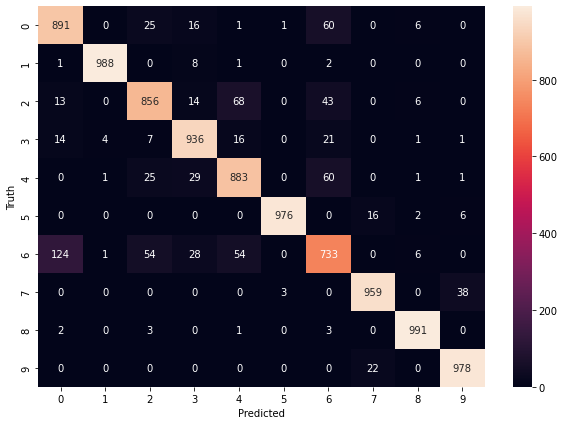

In [13]:
import matplotlib.pyplot as plt

y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')